# Modeling Task Relationships in Multi-task Learning with Multi-gate Mixture-of-Experts

<p> paper-link: https://dl.acm.org/doi/pdf/10.1145/3219819.3220007</p>

This Notebook focuses on the reproducing following sections of the paper

- Section 3. PRELIMINARY
- Section 5. MMOE ON SYNTHETIC DATA

CAUTION: full execution of this notebook may take your 5 hours or more.

In [1]:
import matplotlib.pyplot as plt
from zoo.core import Config, ExpRunner
# exp: the model implementations, and fundamental experiment setting up
from zoo.mmoe import exp
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
conf = {
    "train_data_size": 1000000,
    "dev_data_size": 5000,
    "num_sin_params": 4,
    "model": "moe",
    "model_arch.dim_in": 100,
    "model_arch.dim_hidden_bottom": 16,
    "model_arch.dim_hidden_tower": 8,
    "model_arch.num_expert": 8,
    "model_arch.num_task": 2,
    "num_epoch": 20,
    "batch_size": 40,
    "lr": 1e-4,
    "num_process": 4,
    "task_corr": 0.1,
    "validate_freq": 10000
}

# Performance of the Shared-Bottom model on synthetic data with different task correlation

In [3]:
def process_result(exp_runner):
    df_source = []
    for result in exp_runner.exp_results:
        df_source.append(dict(result))
    # process mean value from each single run
    return pd.DataFrame(df_source).mean()

In [4]:
config = Config(**conf)
config.model = 'shared_bottom'
# hard set the dimensionality of the bottom net to reach a comparable parameter number with MMoE and MoE
config.model_arch.dim_hidden_bottom = 113
print(config)

{'train_data_size': 1000000, 'dev_data_size': 5000, 'num_sin_params': 4, 'model': 'shared_bottom', 'model_arch': {'dim_in': 100, 'dim_hidden_bottom': 113, 'dim_hidden_tower': 8, 'num_expert': 8, 'num_task': 2}, 'num_epoch': 20, 'batch_size': 40, 'lr': 0.0001, 'num_process': 4, 'task_corr': 0.1, 'validate_freq': 10000}


In [ ]:
shared_bottom_stats = {}

for task_corr in [0.5, 0.9, 1.0]:
    config.task_corr = task_corr  # change the task correlation
    runner = ExpRunner(repeat_num=10)  # set up experiment runner, repeat running 10 times under different random seed
    runner.run_mp(exp, config=config)  # run exp under multi-processing setting
    series = process_result(runner)
    shared_bottom_stats[task_corr] = series

  0%|          | 0/10 [00:00<?, ?it/s]

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.



  0%|          | 0/10 [00:00<?, ?it/s]

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.



  0%|          | 0/10 [00:00<?, ?it/s]

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.

Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.
Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.


Cannot get the env variable of GPU_STATUS_FILE, no data report to scheduler. This is not an error. It is because the scheduler of the cluster did not enable this feature.



We show the validation loss of the shared-bottom model under different task-correlation to validate the hypthesis that the task-correlation affects the performance of multi-task learning model.

Higer the task-correlation is, better the multi-task learning model perform, and vice versa.

(0.0, 0.025)

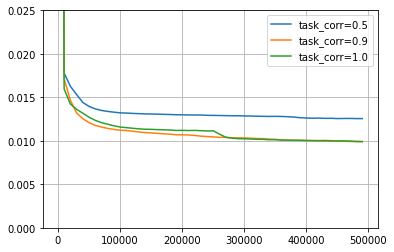

In [16]:
for task_corr in shared_bottom_stats:
    plt.plot(shared_bottom_stats[task_corr], label=f'task_corr={task_corr}')

plt.legend()
plt.grid()
plt.ylim(0, 0.025)

# Performance on MMoE

In [ ]:
config = Config(**conf)
config.model = 'mmoe'
config.model_arch.dim_hidden_bottom = 16

In [ ]:
mmoe_stats = {}

for task_corr in [0.5, 0.9, 1.0]:
    config.task_corr = task_corr
    runner = ExpRunner(repeat_num=5)
    runner.run_mp(exp, config=config)
    series = process_result(runner)
    mmoe_stats[task_corr] = series

# Performance on MoE

In [ ]:
config = Config(**conf)
config.model = 'moe'
print(config)

In [ ]:
moe_stats = {}

for task_corr in [0.5, 0.9, 1.0]:
    config.task_corr = task_corr
    runner = ExpRunner(repeat_num=10)
    runner.run_mp(exp, config=config)
    series = process_result(runner)
    moe_stats[task_corr] = series

# Performance of MMoE, MoE, SharedBottom on synthetic data with different correlations

(0.0, 0.025)

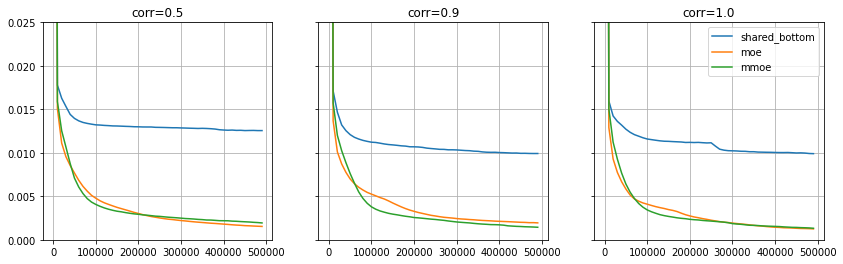

In [15]:
f, ax = plt.subplots(1, 3, figsize=(14, 4), sharey=True)
for i, task_corr in enumerate([0.5, 0.9, 1.0]):
    ax[i].plot(shared_bottom_stats[task_corr], label='shared_bottom')
    ax[i].plot(moe_stats[task_corr], label='moe')
    ax[i].plot(mmoe_stats[task_corr], label='mmoe')
    ax[i].set_title(f"corr={task_corr}")
    ax[i].grid()

ax[-1].legend()
ax[-1].set_ylim(0, 0.025)